## Описание задачи

Имеющийся датасет предоставляет информацию о продуктивности работников в швейной промышленности. Необходимо по имеющимся данным предсказывать производительность работников по заданой информации.

Датасет содержит следующие атрибуты:

* date - Дата в формате ММ-ДД-ГГГГ
* day - День недели
* quarter - Квартал
* department - Отдел
* team - Номер группы
* no_of_workers - Количество рабочих в каждой команде
* no_of_style_change - Количество изменений стиля конкретного товара
* target_productivity - Целевая производительность, устанавливаемая для каждой команды на каждый день.
* smv - Standard Minute Value, это выделенное время для задачи.
* wip - Количество незавершенных изделий для продуктов
* over_time - Представляет количество сверхурочных для каждой команды в минутах.
* incentive - Представляет размер финансового стимула (в BDT), который позволяет или мотивирует определенный образ действий.
* idle_time - Количество времени, в течение которого производство было прервано по нескольким причинам.
* idle_men - Количество рабочих, которые простаивали из-за перебоев в производстве.
* actual_productivity - Фактическая производительность, достигнутая рабочими. Принимает значения от 0 до 1.

Так как перед нами стоит задача классификации, диапазон продутивности необходимо изменить на бинарный признак, отображающий производительность рабочих.

## Чтение и обработка данных, борьба с выбросами.

In [99]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [100]:
url = "https://raw.githubusercontent.com/SokolovAndrey1/ML_UNN/main/garments_worker_productivity.csv"
data_raw = pd.read_csv(url) 

In [101]:
data_raw

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [102]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [103]:
data_raw.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Из приведенных выше данных видно, что:
* В ~43% записей отсутствует информация о количестве незавершенных изделий для продуктов
* Фактическая производительность имеет выбросы (признак должен принимать значения от 0 до 1). Также необходимо преобразовать данный признак в категориальное значение.
* Столбцы с датой, кварталом и номером группы не повлияет на классификацию.
* Признаки с типом "object" необходимо преобразовать в строковые или категориальные значения.

In [104]:
data = data_raw
# Столбцы с датой, кварталом и номером группы не повлияет на классификацию.
# data = data.drop(data.iloc[:,[0, 1, 4]], axis = 1)
data = data.drop(data.loc[:,['date', 'quarter', 'team']], axis = 1)

# Признаки с типом "object" необходимо преобразовать в категориальные значения.
data['department'] = data['department'].astype('category')
data['day'] = data['day'].astype('category')

# В ~43% записей отсутствует информация о количестве незавершенных изделий для продуктов.
data['wip'] = data['wip'].fillna(0)

# Фактическая производительность имеет выбросы.
data['actual_productivity'][data["actual_productivity"] <= 0.75] = 0
data['actual_productivity'] = data['actual_productivity'].astype('bool')

<ipython-input-104-326b06f30f99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actual_productivity'][data["actual_productivity"] <= 0.75] = 0


## Визуализация данных и описательная статистика

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   department             1197 non-null   category
 1   day                    1197 non-null   category
 2   targeted_productivity  1197 non-null   float64 
 3   smv                    1197 non-null   float64 
 4   wip                    1197 non-null   float64 
 5   over_time              1197 non-null   int64   
 6   incentive              1197 non-null   int64   
 7   idle_time              1197 non-null   float64 
 8   idle_men               1197 non-null   int64   
 9   no_of_style_change     1197 non-null   int64   
 10  no_of_workers          1197 non-null   float64 
 11  actual_productivity    1197 non-null   bool    
dtypes: bool(1), category(2), float64(5), int64(4)
memory usage: 88.1 KB


In [106]:
data.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


In [107]:
data.describe(include=['category'])

,department,day
count,1197,1197
unique,3,6
top,sweing,Wednesday
freq,691,208


In [108]:
data.describe(include=['bool'])

,actual_productivity
count,1197
unique,2
top,True
freq,716


Рассмотрим матрицу корреляции для количественных признаков:

In [109]:
corr_mat = data.corr()
corr_mat

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.399369
smv,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.056642
wip,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.063613
over_time,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,0.000162
incentive,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.097891
idle_time,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.069651
idle_men,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.130051
no_of_style_change,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.229777
no_of_workers,-0.084288,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.003698
actual_productivity,0.399369,-0.056642,0.063613,0.000162,0.097891,-0.069651,-0.130051,-0.229777,-0.003698,1.000000


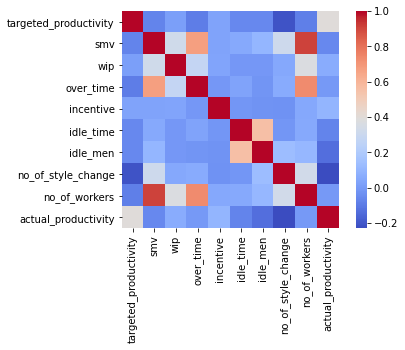

In [110]:
sns.heatmap(corr_mat, square = True, cmap = 'coolwarm')
pass

In [111]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

smv        no_of_workers    0.912176
over_time  no_of_workers    0.734164
smv        over_time        0.674887
idle_time  idle_men         0.559146
dtype: float64

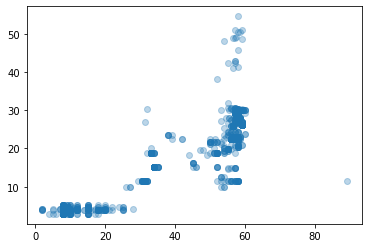

In [152]:
plt.scatter(data['no_of_workers'], data['smv'], alpha=0.3)
pass

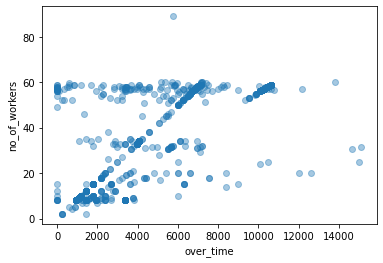

In [154]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['over_time'], data.iloc[random_subset]['no_of_workers'], alpha=0.4)
plt.xlabel('over_time')
plt.ylabel('no_of_workers')
pass

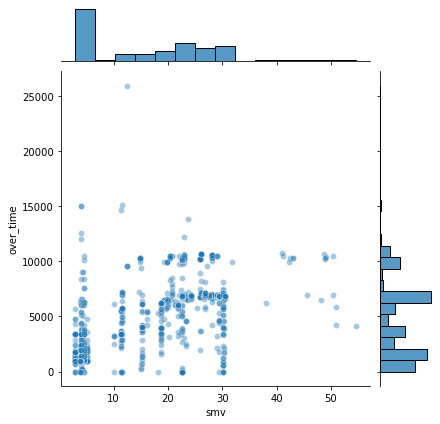

In [157]:
sns.jointplot(x='smv', y='over_time', alpha=.4, data=data)
pass

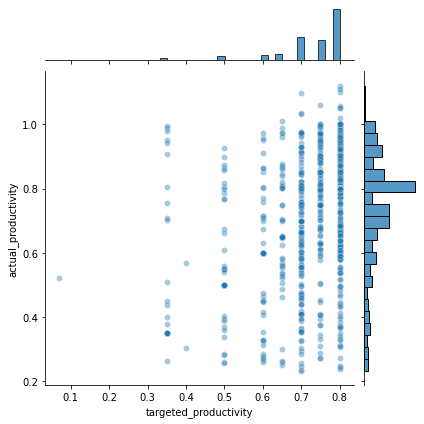

In [160]:
sns.jointplot(x='targeted_productivity', y='actual_productivity', alpha=.4, data=data_raw)
pass

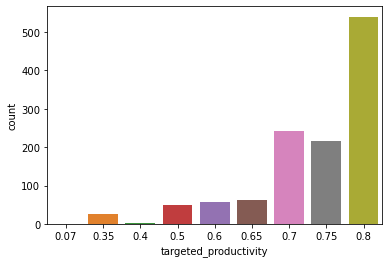

In [112]:
sns.countplot(x='targeted_productivity', data=data)
pass

In [116]:
data['department'] = pd.factorize(data['department'])[0]
data['day'] = pd.factorize(data['day'])[0]

## Разбиение данные на обучающую и тестовую выборки

In [117]:
X = data.drop(['actual_productivity'], axis=1)
y = data['actual_productivity']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

## Метод k-nearest neighbors

In [138]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [139]:
y_train_predict = knn.predict(X_train)
y_test_predict  = knn.predict(X_test)

In [140]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.24850657108721624
Ошибка на тестовой выборке:  0.36666666666666664


## Заключение

